In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
pip install Faker

     |████████████████████████████████| 1.5 MB 4.7 MB/s 


Read in data file.

In [18]:
from faker import Faker
faker = Faker()
Faker.seed(2022)

In [36]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/allYearsTyler.xlsx")
df.columns

Index(['Year', 'Course ', 'Course Name', 'Student #', 'Last Name',
       'First Name', 'GrType', 'Earned ', 'Score', 'Final Gr', 'Grade Point',
       'QP', 'HQP', 'GPA', 'Report Card', 'Transcript', 'Honor Roll'],
      dtype='object')

In [37]:
# combine first and last names to be able to anonymize and publish
# combine student number as well for students with the same name
# also drop the original 3 columns to anonymize
df['Name'] = df['First Name'] + ' ' + df['Last Name'] + ' ' + df['Student #'].astype(str)
df.drop(['Student #', 'First Name', 'Last Name'], axis=1, inplace=True)
# df.head()

In [42]:
# df.Name.value_counts()

In [39]:
# anonymize the names 
dict_names = {name: faker.name() for name in df['Name'].unique()}
df['alias'] = df['Name'].map(dict_names)

In [43]:
# df.alias.value_counts()

Those value counts verified the alias matches up with the names.

In [44]:
df.drop(['Name'], axis=1, inplace=True)
df.head()

,Year,Course,Course Name,GrType,Earned,Score,Final Gr,Grade Point,QP,HQP,GPA,Report Card,Transcript,Honor Roll,alias
0,2122,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins
1,2122,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins
2,2122,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins
3,2122,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins
4,2122,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins


In [45]:
# make years make more sense
# change 1718 to the graduation year, 2018, etc.
map_years = {1718:2018, 1819:2019, 1920:2020, 2021:2021, 2122:2022}
df.replace({"Year":map_years}, inplace=True)

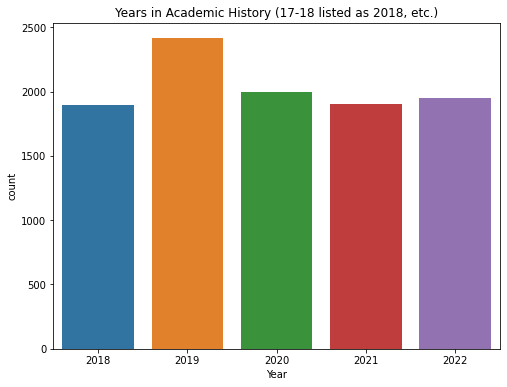

In [46]:
countplt, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='Year', data=df).set_title("Years in Academic History (17-18 listed as 2018, etc.)");

In [47]:
df.describe()

,Year,Earned,Score,Grade Point,QP,HQP,GPA,Report Card,Transcript,Honor Roll
count,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.00000,10167.000000,10167.000000,10167.000000,8964.000000
mean,2019.960366,0.505460,62.772274,2.377369,1.436014,0.00939,0.749975,0.990263,0.806629,0.864904
std,1.392028,0.451124,38.479405,1.825844,1.758916,0.05773,0.433048,0.098201,0.394961,0.341845
min,2018.000000,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,0.000000,15.000000,1.000000,0.000000,0.00000,0.500000,1.000000,1.000000,1.000000
50%,2020.000000,0.500000,81.000000,3.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,1.000000,93.000000,4.000000,2.250000,0.00000,1.000000,1.000000,1.000000,1.000000
max,2022.000000,4.500000,103.000000,99.000000,99.000000,0.50000,1.000000,1.000000,1.000000,1.000000


In [48]:
# remove spaces at beginning and end of column names
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Year', 'Course', 'Course_Name', 'GrType', 'Earned', 'Score',
       'Final_Gr', 'Grade_Point', 'QP', 'HQP', 'GPA', 'Report_Card',
       'Transcript', 'Honor_Roll', 'alias'],
      dtype='object')

In [49]:
# explore data anomalies
# Earned credit per course shouldn't be 4.5, Grade Point and QP should not be 99
df[df.Earned > 1]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias
266,2021,3013,CULINARY ARTS,Year,3.00,93.0,A,3.750000,11.250000,0.0,1.0,1.0,1.0,1.0,Zachary Hill
385,2021,3013,CULINARY ARTS,Year,3.00,68.0,D,1.250000,3.750000,0.0,1.0,1.0,1.0,1.0,Jay Davis
546,2021,3021,HVAC,Year,3.00,91.0,A,3.500000,10.500000,0.0,1.0,1.0,1.0,1.0,Bethany Nelson
598,2021,3017,WELDING,Year,3.00,94.0,A,4.000000,12.000000,0.0,1.0,1.0,1.0,1.0,Christopher Lee
1110,2021,3012,COM ART/DESIGN,Year,3.00,89.0,B,3.250000,9.750000,0.0,1.0,1.0,1.0,1.0,Julia Mitchell
1256,2021,3001,BUSINESS INFO SYS,Year,3.00,78.0,C,2.500000,7.500000,0.0,1.0,1.0,1.0,1.0,Paula White
1330,2021,3014,CARPENTRY,Year,3.00,97.0,A,4.000000,12.000000,0.0,1.0,1.0,1.0,1.0,Eugene Schneider
1481,2021,3014,CARPENTRY,Year,3.00,88.0,B,3.250000,9.750000,0.0,1.0,1.0,1.0,1.0,Amy Jackson
1915,2021,3000,GRAPHIC ARTS,Year,3.00,98.0,A,4.000000,12.000000,0.0,1.0,1.0,1.0,1.0,Edward Dixon
2696,2021,3021,HVAC,Year,3.00,93.0,A,3.750000,11.250000,0.0,1.0,1.0,1.0,1.0,Dennis Farrell


### Guidance counselor - (check these high amounts of credits) Those seem to be votech, so they should be correct.

In [50]:
# These might all be correct, but worth checking out
df.Earned.value_counts()

1.00    3625
0.00    3023
0.50    1958
0.25     669
0.20     407
0.30     406
3.00      42
0.40      18
1.50      13
0.10       2
0.15       2
4.50       1
4.00       1
3.37       1
Name: Earned, dtype: int64

### Notice above that out of over 10000 rows, there are some oddly awarded numbers of credits. ###
18 classes got 0.4<br>
13 classes got 1.5<br>
2 classes got 0.1<br>
2 classes got 0.15<br>
1 class got 4.5<br>
1 class got 4<br>
1 class got 3.37

There will be a table with just those rows if you want to check/fix them - `odd_credits`

In [51]:
strange_amts_cr = [0.4,1.5,0.1,0.15,4.5,4,3.37]
odd_credits = df[df.Earned.isin(strange_amts_cr)]
print("There are {} rows here".format(odd_credits.shape[0]))
odd_credits

There are 38 rows here


,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias
8029,2019,5905,Biology CP,Year,1.50,70.0,C,2.0,3.00,0.0,1.0,1.0,1.0,1.0,John Crosby
8915,2020,5620,Algebra I,Year,1.50,85.0,B,3.0,4.50,0.0,1.0,1.0,1.0,1.0,Kenneth Williams
8916,2020,3004,Electrical Systems,Year,4.50,90.0,A,4.0,18.00,0.0,1.0,1.0,1.0,1.0,Kenneth Williams
8917,2020,1605,English 10,Year,1.50,80.0,B,3.0,4.50,0.0,1.0,1.0,1.0,1.0,Kenneth Williams
8942,2020,3014,CARPENTRY,Year,4.00,96.0,A,4.0,16.00,0.0,1.0,1.0,1.0,1.0,Christina Allen
8972,2020,3014,Const. Tech IB,Year,3.37,72.0,C,2.0,6.74,0.0,1.0,1.0,1.0,1.0,Benjamin Reese
8978,2019,5620,Algebra I,Year,1.50,65.0,D,1.0,1.50,0.0,1.0,1.0,1.0,1.0,Benjamin Reese
8981,2019,5905,Environmental Biology,Year,1.50,65.0,D,1.0,1.50,0.0,1.0,1.0,1.0,1.0,Benjamin Reese
9006,2020,5905,Biology,Year,1.50,72.0,C,2.0,3.00,0.0,1.0,1.0,1.0,1.0,Kathryn Hinton
9007,2020,5635,Computer Algebra II,Year,1.50,65.0,D,1.0,1.50,0.0,1.0,1.0,1.0,1.0,Kathryn Hinton


In [52]:
df[df.Grade_Point > 4]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias
9912,2018,JH0781,Health/PE,JH Year,1.0,99.0,99,99.0,99.0,0.0,0.0,1.0,0.0,0.0,Thomas Clark


## Guidance counselor - Thomas' Grade Point needs changed from 99 to 4. ##

### Guidance counselor - Also, make sure his QP gets changed.  And should his GPA be 0? ###

In [53]:
# I'm changing it here for the data to be correct, but it needs changed in the AH
df.at[9912, 'Grade_Point'] = 4.0
df.iloc[9912]

Year                   2018
Course               JH0781
Course_Name       Health/PE
GrType            JH Year  
Earned                  1.0
Score                  99.0
Final_Gr                 99
Grade_Point             4.0
QP                     99.0
HQP                     0.0
GPA                     0.0
Report_Card             1.0
Transcript              0.0
Honor_Roll              0.0
alias          Thomas Clark
Name: 9912, dtype: object

In [54]:
# doing the same for QP
df.at[9912, 'QP'] = 4.0
df.iloc[9912]

Year                   2018
Course               JH0781
Course_Name       Health/PE
GrType            JH Year  
Earned                  1.0
Score                  99.0
Final_Gr                 99
Grade_Point             4.0
QP                      4.0
HQP                     0.0
GPA                     0.0
Report_Card             1.0
Transcript              0.0
Honor_Roll              0.0
alias          Thomas Clark
Name: 9912, dtype: object

In [55]:
df.describe()

,Year,Earned,Score,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll
count,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.00000,10167.000000,10167.000000,10167.000000,8964.000000
mean,2019.960366,0.505460,62.772274,2.368025,1.426671,0.00939,0.749975,0.990263,0.806629,0.864904
std,1.392028,0.451124,38.479405,1.554226,1.469049,0.05773,0.433048,0.098201,0.394961,0.341845
min,2018.000000,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,0.000000,15.000000,1.000000,0.000000,0.00000,0.500000,1.000000,1.000000,1.000000
50%,2020.000000,0.500000,81.000000,3.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,1.000000,93.000000,4.000000,2.250000,0.00000,1.000000,1.000000,1.000000,1.000000
max,2022.000000,4.500000,103.000000,4.000000,18.000000,0.50000,1.000000,1.000000,1.000000,1.000000


In [57]:
df['total_earned_credits'] = df['Earned'].groupby(df["alias"]).transform("sum")
df.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5


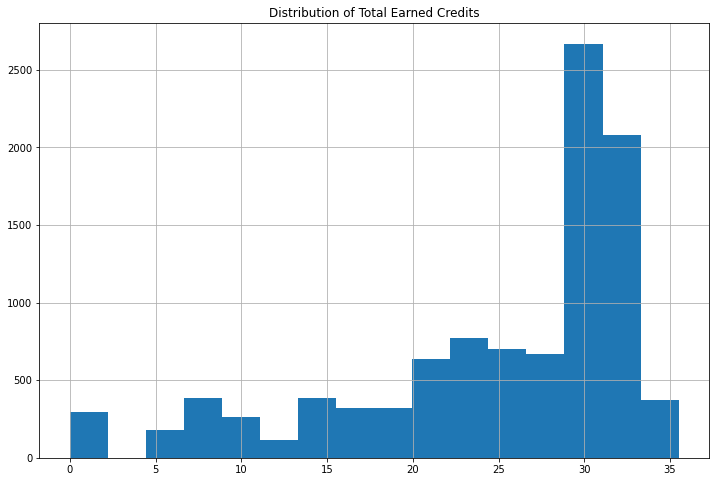

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
ax = df.total_earned_credits.hist(bins=16)
plt.title("Distribution of Total Earned Credits");

In [59]:
# get rid of NaNs in Grade column
# UNLESS...the year is 2022
df[df.Final_Gr.isna()]['Score'].value_counts()

0.0    2347
Name: Score, dtype: int64

Actually, a LOT needs to be looked at before changing the Final_Gr NaNs.  Some of them make sense, some do not.

In [60]:
df[df.Year==2022]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,2022,1780,STUDY SEMINAR,S2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,NaN,Anna Duffy,27.0
10118,2022,1785,TRANSITION,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Anna Duffy,27.0
10119,2022,1217,US GOVT,S1,0.5,76.0,C,2.0,1.0,0.0,1.0,1.0,1.0,1.0,Anna Duffy,27.0
10120,2022,1521,WEIGHT TRAINING FOR THE FEMALE ATHLETE,S2,0.0,0.0,NaN,3.0,0.0,0.0,1.0,1.0,1.0,NaN,Anna Duffy,27.0


In [61]:
# Sememster course grades can stay here, but all Year or S2 courses can be filled in with Cur for Currently taking
# Or...change to Lab if the course is a lab
print("Number of missing grades in 2022 are {}".format(df[df.Year==2022]['Final_Gr'].isna().sum()))
df[df.Year==2022]['Final_Gr'].value_counts()

Number of missing grades in 2022 are 1509


A    203
B     77
E     70
C     40
P     27
D     25
Name: Final_Gr, dtype: int64

In [62]:
print("There are {} missing Final Grades (showing as NaN (not a number)).".format(df.Final_Gr.isna().sum()))

There are 2347 missing Final Grades (showing as NaN (not a number)).


All of these NaNs need checked out more.  Some are for current year courses, but some are past year "lab" courses for AP classes.  Let's look at just all NaNs to see how to fix them.

In [63]:
no_grades_df = df[df.Final_Gr.isna()]
no_grades_df.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5


In [64]:
print(len(no_grades_df))
no_grades_df['Final_Gr'].isna().sum()

2347


2347

In [66]:
# look at these for each year
ng_2022 = no_grades_df[no_grades_df.Year==2022][['Year','Course','Course_Name','alias', 'GrType', 'Earned']]
ng_2021 = no_grades_df[no_grades_df.Year==2021][['Year','Course','Course_Name','alias', 'GrType', 'Earned']]
ng_2020 = no_grades_df[no_grades_df.Year==2020][['Year','Course','Course_Name','alias', 'GrType', 'Earned']]
ng_2019 = no_grades_df[no_grades_df.Year==2019][['Year','Course','Course_Name','alias', 'GrType', 'Earned']]
ng_2018 = no_grades_df[no_grades_df.Year==2018][['Year','Course','Course_Name','alias', 'GrType', 'Earned']]

ng_dfs_past_years = [ng_2021, ng_2020, ng_2019, ng_2018]

def get_yearly_info(ng_yr):
  courses = ng_yr.groupby('Course_Name')['alias'].count()
  #print("Courses that got no final grade in year {} are\n".format(ng_yr['Year']))
  print(courses)
  print("\n\n")

for ng in ng_dfs_past_years:
  get_yearly_info(ng)

# ng_2018.groupby('Course_Name')['Student_#'].count()

Course_Name
ACCOUNTING II                 1
ALGEBRA II                    3
ANATOMY & PHYSIOLOGY          5
AP Calculus AB Lab            4
AP EURO HISTORY               2
                             ..
WELDING & FABRICATION TEC     2
WORKPLACE READINESS           1
WORLD CULTURES               18
World Cultures                8
World Cultures CR             1
Name: alias, Length: 96, dtype: int64



Course_Name
ACCOUNTING I                       1
ALGEBRA I                          7
ALGEBRA II                         4
AMER.CULT. II                     10
AP COMPUTER SCIENCE PRINCIPLES     1
                                  ..
Self Directed Exp Learning         1
Study Hall                         2
TEAM SPORTS                        2
VIDEO PRO I                        1
WEIGHT TRAINING                    1
Name: alias, Length: 61, dtype: int64



Course_Name
ALGEBRA I                8
ALGEBRA IA               9
ALT.ED.ENGLISH GR.9      1
ALT.ED.MATH GR. 9        1
ALT.ED.PHYS.ED 

## There are a lot of courses where the student's final grade is non-existent, and not just for the current school year. ##

In [67]:
df.Final_Gr.value_counts()

A     3130
B     1769
C     1140
D      709
E      626
P      398
F       30
I       14
CP       3
83       1
99       1
Name: Final_Gr, dtype: int64

Now look at the 5 with Final Grades of CP, 99, and 83, then change them.

In [68]:
df[df.Final_Gr.isin(['CP',99,83])]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
803,2021,5504,Spanish III,Year,1.0,83.0,83,3.0,0.18,0.18,1.0,1.0,1.0,1.0,Patrick Pena,18.25
9077,2020,125,Crew 10,Year,0.5,65.0,CP,1.0,0.50,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80
9079,2020,170,Fitness,Year,0.5,69.0,CP,1.0,0.50,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80
9082,2020,1265,US History,Year,1.0,85.0,CP,3.0,3.00,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80
9912,2018,JH0781,Health/PE,JH Year,1.0,99.0,99,4.0,4.00,0.00,0.0,1.0,0.0,0.0,Thomas Clark,6.50


## Guidance Counselor - Use the above 5 rows to find the students, years, and courses where the Final Grade needs changed (to an A, a B, D, D, and B). ##

In [69]:
df.at[9912, 'Final_Gr'] = "A"
df.at[803, 'Final_Gr'] = "B"
df.at[9077, 'Final_Gr'] = "D"
df.at[9079, 'Final_Gr'] = "D"
df.at[9082, 'Final_Gr'] = "B"
df.loc[[9912,803,9077,9079,9082]]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
9912,2018,JH0781,Health/PE,JH Year,1.0,99.0,A,4.0,4.00,0.00,0.0,1.0,0.0,0.0,Thomas Clark,6.50
803,2021,5504,Spanish III,Year,1.0,83.0,B,3.0,0.18,0.18,1.0,1.0,1.0,1.0,Patrick Pena,18.25
9077,2020,125,Crew 10,Year,0.5,65.0,D,1.0,0.50,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80
9079,2020,170,Fitness,Year,0.5,69.0,D,1.0,0.50,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80
9082,2020,1265,US History,Year,1.0,85.0,B,3.0,3.00,0.00,1.0,1.0,1.0,1.0,Sherry Anderson,19.80


In [70]:
# check that column again for valid entries
df.Final_Gr.value_counts()

A    3131
B    1771
C    1140
D     711
E     626
P     398
F      30
I      14
Name: Final_Gr, dtype: int64

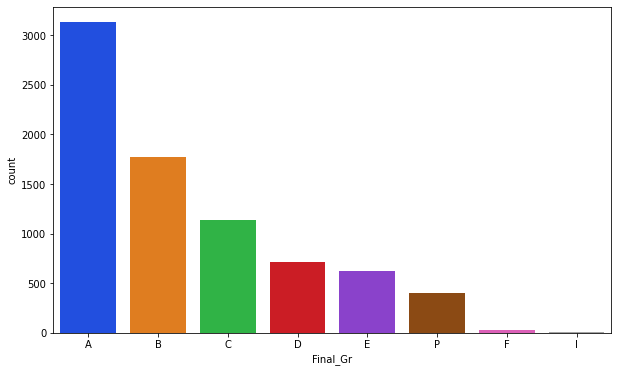

In [71]:
# get a visual of these grades
# set the order first
grade_order = ['A','B','C','D','E','P','F','I']
countplt, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df.Final_Gr, order=grade_order, palette='bright');

## ^^ This is a surprising final grade distribution.

In [72]:
df.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Transcript,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,NaN,Jessica Collins,0.5


 - Look at records where the transcript flag is true vs. where it is false
 - Do the same for the report card flag


In [73]:
transcript_T = df[df.Transcript == 1]
transcript_F = df[df.Transcript == 0]
report_card_T = df[df.Report_Card == 1]
report_card_F = df[df.Report_Card == 0]

transcript_T = transcript_T.drop("Transcript", axis=1)
transcript_T.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5


In [74]:
transcript_F = transcript_F.drop("Transcript", axis=1)

report_card_T = report_card_T.drop("Report_Card", axis=1)
report_card_F = report_card_F.drop("Report_Card", axis=1)

transcript_F.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Honor_Roll,alias,total_earned_credits
16,2018,JH0700,ART,S1,0.50,99.0,A,4.0,2.0,0.0,0.0,1.0,1.0,Mark Cochran,6.5
17,2018,JH0800,ART 8,Quarter 2,0.25,100.0,A,4.0,1.0,0.0,0.0,1.0,1.0,Mark Cochran,6.5
18,2018,JH0678,COMPUTER 8,Quarter 3,0.25,98.0,A,4.0,1.0,0.0,0.0,1.0,1.0,Mark Cochran,6.5
19,2018,JH0083,ENGLISH,JH Year,1.00,93.0,A,4.0,4.0,0.0,0.0,1.0,1.0,Mark Cochran,6.5
20,2018,JH0687,F&CS 8,Quarter 1,0.25,98.0,A,4.0,1.0,0.0,0.0,1.0,1.0,Mark Cochran,6.5


In [75]:
report_card_T.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Transcript,Honor_Roll,alias,total_earned_credits
0,2022,5620,Algebra I,Year,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,Jessica Collins,0.5
1,2022,5220,Career Readiness,Year,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,Jessica Collins,0.5
2,2022,6216,Economics,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5
3,2022,1500,H & PE I,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5
4,2022,6520,PE IV,S2,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,Jessica Collins,0.5


In [76]:
report_card_F.head()

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Transcript,Honor_Roll,alias,total_earned_credits
214,2019,1780,STUDY SEMINAR,S1,0.5,63.0,P,0.0,0.0,0.0,0.0,0.0,0.0,Adrian Perez,26.5
243,2019,2005,LUNCH 2ND SEM.,S2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Mr. Brian Rodriguez,1.5
261,2022,HRM,Homeroom,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Zachary Hill,25.5
392,2021,1785,TRANSITION,Year,1.0,59.5,P,0.0,0.0,0.0,0.0,1.0,0.0,Jay Davis,32.0
525,2019,1780,STUDY SEMINAR,S1,0.5,100.0,P,0.0,0.0,0.0,0.0,0.0,0.0,Phillip Rubio,32.5


## On the transcript but not on the report card ##

In [77]:
# what classes go on the transcript but not on the report card...and why?
transcript_T[transcript_T['Report_Card'] == 0]

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Report_Card,Honor_Roll,alias,total_earned_credits
392,2021,1785,TRANSITION,Year,1.0,59.5,P,0.0,0.0,0.0,0.0,0.0,0.0,Jay Davis,32.0
707,2021,667,AP Calculus AB Lab,S1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Joshua Lowery,30.0
1521,2022,957,AP Physics I Lab,S1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Cindy Trujillo,31.0
1803,2021,667,AP Calculus AB Lab,S1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Mr. David Porter Jr.,33.0
4330,2021,5207,Career Readiness CR,Year,1.0,59.5,P,0.0,0.0,0.0,0.0,0.0,0.0,Michael Chapman,31.0
4491,2021,667,AP Calculus AB Lab,S1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Julian Dunn,30.0
4847,2021,667,AP Calculus AB Lab,S1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Janet Smith,32.0
5274,2020,1507,Phys Ed 10,Year,0.3,70.0,C,2.0,0.6,0.0,0.0,0.0,0.0,Cynthia Brown,15.6
5449,2021,1785,TRANSITION,Year,1.0,59.5,P,0.0,0.0,0.0,0.0,0.0,0.0,Amy Martinez,30.5
6914,2021,1785,TRANSITION,Year,1.0,59.5,P,0.0,0.0,0.0,0.0,0.0,0.0,Anthony Rivera,32.2


## Guidance counselor - maybe take those off of the transcript ^^ ##

## Also...should all labs *not* be on the transrcipt?  "Cindy" is the only one from AP Physics 1 lab.  And there is a Phys Ed 10 - *should* go on the report card?

## On the report card but not on the transcript ##

In [78]:
on_rc_not_on_tr = report_card_T[report_card_T['Transcript'] == 0]
on_rc_not_on_tr

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Transcript,Honor_Roll,alias,total_earned_credits
16,2018,JH0700,ART,S1,0.50,99.0,A,4.0,2.0,0.0,0.0,0.0,1.0,Mark Cochran,6.5
17,2018,JH0800,ART 8,Quarter 2,0.25,100.0,A,4.0,1.0,0.0,0.0,0.0,1.0,Mark Cochran,6.5
18,2018,JH0678,COMPUTER 8,Quarter 3,0.25,98.0,A,4.0,1.0,0.0,0.0,0.0,1.0,Mark Cochran,6.5
19,2018,JH0083,ENGLISH,JH Year,1.00,93.0,A,4.0,4.0,0.0,0.0,0.0,1.0,Mark Cochran,6.5
20,2018,JH0687,F&CS 8,Quarter 1,0.25,98.0,A,4.0,1.0,0.0,0.0,0.0,1.0,Mark Cochran,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10163,2018,JH0687,F&CS 8,Quarter 4,0.25,75.0,C,2.0,0.5,0.0,0.0,0.0,1.0,Anna Duffy,27.0
10164,2018,JH8001,PHYSICAL EDUCATION 8,Quarter 3,0.25,94.0,A,4.0,1.0,0.0,0.0,0.0,1.0,Anna Duffy,27.0
10165,2018,JH0408,PRE-ALGEBRA,JH Year,1.00,78.0,C,2.0,2.0,0.0,0.0,0.0,1.0,Anna Duffy,27.0
10166,2018,JH0508,READING 8,JH Year,1.00,85.0,B,3.0,3.0,0.0,0.0,0.0,1.0,Anna Duffy,27.0


Check to see if these are all 8th grade classes (on senior academic history from 2017-2018).

In [79]:
on_rc_not_on_tr.Year.value_counts()

2018    1850
2022      13
2019      11
2021       3
Name: Year, dtype: int64

Look at the 27 not from 8th grade more closely.

In [80]:
rc_but_not_transcript_no_grade8 = on_rc_not_on_tr[on_rc_not_on_tr.Year != 2018]
rc_but_not_transcript_no_grade8.to_csv("/content/drive/MyDrive/Colab Notebooks/co22_rc_but_not_transcript_not_grade8.csv")
rc_but_not_transcript_no_grade8

,Year,Course,Course_Name,GrType,Earned,Score,Final_Gr,Grade_Point,QP,HQP,GPA,Transcript,Honor_Roll,alias,total_earned_credits
236,2019,235,COMPUTER APPS,S2,0.0,0.0,E,0.0,0.0,0.0,0.0,0.0,1.0,Mr. Brian Rodriguez,1.50
264,2022,1217,US GOVT,S1,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Zachary Hill,25.50
1856,2022,1785,TRANSITION,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Patrick Clark,30.50
2639,2022,1217,US GOVT,S1,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,1.0,Dwayne Allen,29.50
3571,2021,925,ANATOMY & PHYSIOLOGY,Year,0.0,0.0,NaN,4.0,0.0,0.0,0.0,0.0,1.0,Lindsey Jones,31.00
3632,2021,965,EARTH & SPACE SCIENCE,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,Linda Ross,31.50
4899,2022,335,PRACTICAL ENGLISH 12,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Nicole Long,26.00
4908,2022,205,WORKPLACE READINESS,Year,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,Nicole Long,26.00
5262,2022,205,WORKPLACE READINESS,Year,0.0,0.0,NaN,4.0,0.0,0.0,0.0,0.0,1.0,Cynthia Brown,15.60
5589,2022,965,EARTH & SPACE SCIENCE,Year,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Gary Dominguez,17.50


## There seems to be A LOT going on there. ##
- Almost all grades are missing. (should be E? - or if they dropped, they need removed from AH)
- If not dropped from AH, make sure grade points that aren't 0.0 (for some reason) aren't being counted into a cumulative GPA.
- Some of these were used for Honor Roll calculations?

From what the tech supervisor found, she thinks all of these kids dropped the courses.  There may be a problem where kids got a grade first before dropping.  They now have Grade Points that may be getting calculated in to GPAs.

## Something else to look at - a LOT of different grade point values.  ##

In [81]:
grade_points = df.Grade_Point.value_counts().sort_index(ascending=False).to_frame()
grade_points.reset_index(inplace=True)
grade_points = grade_points.rename(columns = {'index':'Grade_point', 'Grade_Point':'count'})
grade_points.head()


,Grade_point,count
0,4.000000,3108
1,3.750000,129
2,3.666667,59
3,3.666666,78
4,3.500000,452


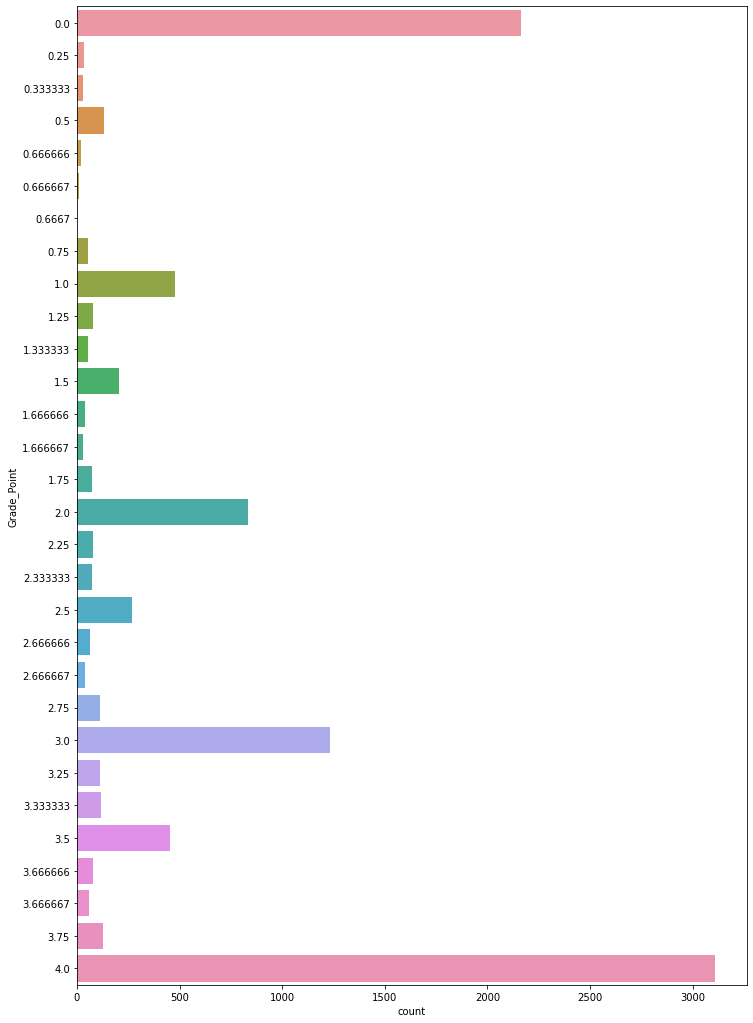

In [82]:
fig, ax = plt.subplots(figsize=(12,18))
sns.countplot(y="Grade_Point", data=df, ax=ax);

In [83]:
df.Grade_Point.sort_values()

0       0.0
6058    0.0
6057    0.0
6056    0.0
6054    0.0
       ... 
6193    4.0
6192    4.0
6191    4.0
6197    4.0
5083    4.0
Name: Grade_Point, Length: 10168, dtype: float64